In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 22})

# 5.2 - Collect PicoSampler Data

We collect data with the PicoSampler from class. We know that the ADC samples at $2^{16}$ bits and samples at $62.5$ MHz / $N$ where $N$ is the divisor number. We chose a Voltage range of 2 Volts for $V_{pp} = 1 V$

In [3]:
import ugradio

In [37]:
data_0 = ugradio.pico.capture_data("2V", divisor=10) #625 kHz

In [38]:
data_1 = ugradio.pico.capture_data("2V", divisor=10) #1.25 MHz

In [39]:
data_2 = ugradio.pico.capture_data("2V", divisor=10) #1.875 MHz

In [40]:
data_3 = ugradio.pico.capture_data("2V", divisor=10) #2.5 MHz

In [41]:
data_4 = ugradio.pico.capture_data("2V", divisor=10) #3.125 MHz

In [42]:
data_5 = ugradio.pico.capture_data("2V", divisor=10) #3.75 MHz

In [43]:
data_6 = ugradio.pico.capture_data("2V", divisor=10) #4.375 MHz

In [44]:
data_7 = ugradio.pico.capture_data("2V", divisor=10) #5 MHz

In [45]:
data_8 = ugradio.pico.capture_data("2V", divisor=10) #5.625 MHz

In [46]:
data_9 = ugradio.pico.capture_data("2V", divisor=10) #6.25 MHz

## Save Data to `.csv`

In [48]:
data_dict = {"0.625 MHz":data_0[0,0,:], "1.25 MHz":data_1[0,0,:], "1.875 MHz":data_2[0,0,:],
             "2.5 MHz":data_3[0,0,:], "3.125 MHz":data_4[0,0,:], "3.75 MHz":data_5[0,0,:],
            "4.375 MHz":data_6[0,0,:], "5 MHz":data_7[0,0,:], "5.625 MHz":data_8[0,0,:], "6.25 MHz": data_9[0,0,:]}

data_df = pd.DataFrame(data_dict)

In [63]:
data_df.to_csv("final_data.csv")

In [6]:
data_df = pd.read_csv("data/final_data.csv")

data_df

,Unnamed: 0,0.625 MHz,1.25 MHz,1.875 MHz,2.5 MHz,3.125 MHz,3.75 MHz,4.375 MHz,5 MHz,5.625 MHz,6.25 MHz
0,0,6912,-9984,-5888,11264,-10496,-4096,-15360,7680,1536,12800
1,1,14080,-15360,-12544,-2304,10496,-5888,7936,15360,10240,12800
2,2,16128,512,13568,-7680,-10496,13312,10496,2048,15104,12800
3,3,11776,15616,4096,14592,10496,-15872,-14592,-14080,14080,12800
4,4,3072,8960,-16128,-15872,-10496,12288,-1536,-10752,7680,12800
...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,-12800,-15872,14592,14848,-11008,2048,15872,10240,15360,14848
15996,15996,-16128,-2304,-11008,-8448,11008,7680,-3584,-8192,11008,14848
15997,15997,-13312,14592,-7936,-1280,-11008,-14336,-13568,-15360,2304,14848
15998,15998,-5376,11264,15872,10496,11008,15616,12032,-1280,-7168,14848


## Show Data

In [7]:
ν_s  = 62.5e6 / 10 
Δt = 1 / ν_s

samples = np.arange(0, len(data_df["2.5 MHz"]))
times = samples * Δt

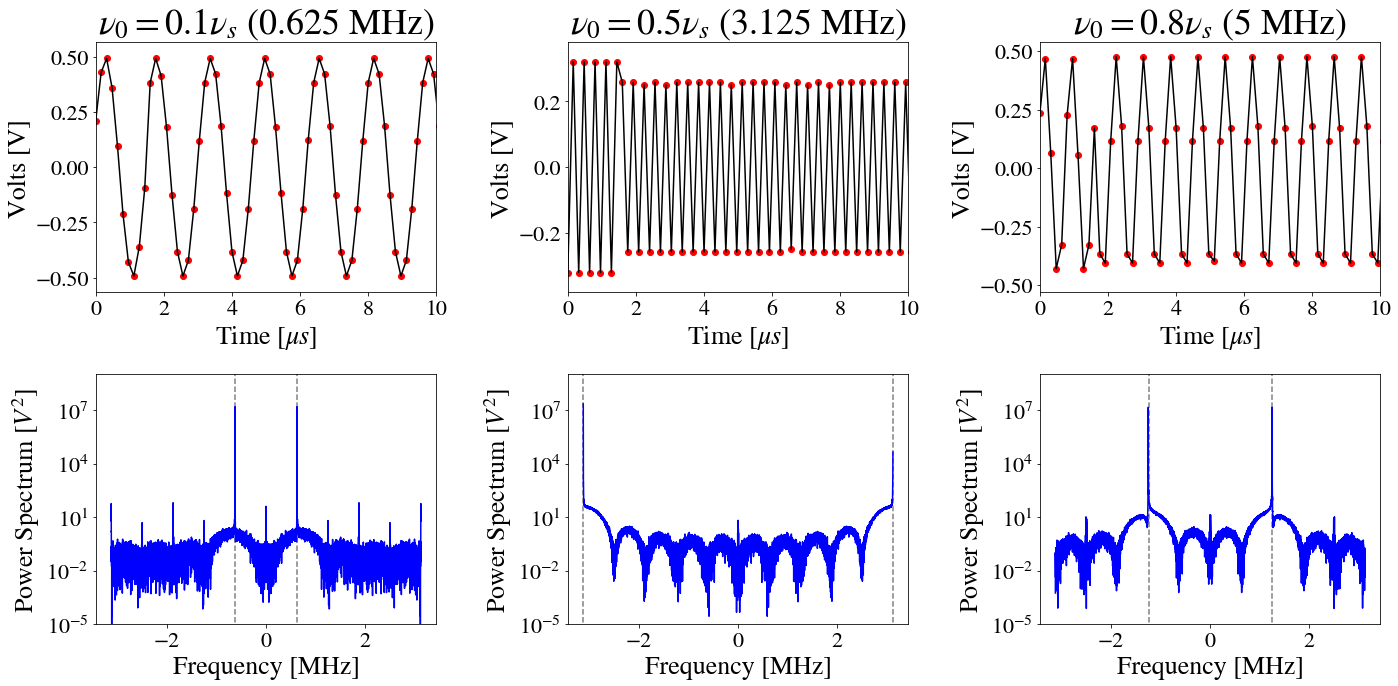

In [123]:
# plt.figure(figsize=(12,8))
# for key in data_dict.keys(): 
#     plt.plot(times*1000000, data_df[key]/(2**15), label=key)
fig, axes = plt.subplots(2,3, figsize=(20, 10))

axes[0,0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)", fontsize=36)
axes[0,0].plot(times*1e6, data_df["0.625 MHz"]/(2**15), color="black")
axes[0,0].scatter(times*1e6, data_df["0.625 MHz"]/(2**15), marker="o", color="red")
axes[0,0].set_xlim(0,10)
axes[0,0].set_ylabel("Volts [V]", fontsize=26)
axes[0,0].set_xlabel("Time [$\\mu s$]", fontsize=26)

axes[0,1].set_title("$\\nu_0 = 0.5 \\nu_s$ (3.125 MHz)", fontsize=36)
axes[0,1].plot(times*1e6, data_df["3.125 MHz"]/(2**15), color="black")
axes[0,1].scatter(times*1e6, data_df["3.125 MHz"]/(2**15), marker="o", color="red")
axes[0,1].set_xlim(0,10)
axes[0,1].set_ylabel("Volts [V]", fontsize=26)
axes[0,1].set_xlabel("Time [$\\mu s$]", fontsize=26)

axes[0,2].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)", fontsize=36)
axes[0,2].plot(times*1e6, data_df["5 MHz"]/(2**15),color="black")
axes[0,2].scatter(times*1e6, data_df["5 MHz"]/(2**15), marker="o", color="red")
axes[0,2].set_xlim(0,10)
axes[0,2].set_ylabel("Volts [V]", fontsize=26)
axes[0,2].set_xlabel("Time [$\\mu s$]", fontsize=26)

###########################################################


# axes[1,0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
axes[1,0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["0.625 MHz"]/(2**15))))**2, color="blue")
axes[1,0].vlines(x=0.625, ymin=0, ymax=1e9, linestyle="--", color="gray")
axes[1,0].vlines(x=-0.625, ymin=0, ymax=1e9, linestyle="--", color="gray")
axes[1,0].set_ylim(1e-5, 1e9)
axes[1,0].set_xlabel("Frequency [MHz]", fontsize=26)
axes[1,0].set_ylabel("Power Spectrum [$V^2$]", fontsize=26)
axes[1,0].semilogy()

# axes[1,1].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
axes[1,1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["3.125 MHz"]/(2**15))))**2, color="blue")

axes[1,1].vlines(x=3.125, ymin=0, ymax=1e9, linestyle="--", color="gray")
axes[1,1].vlines(x=-3.125, ymin=0, ymax=1e9, linestyle="--", color="gray")
axes[1,1].set_ylim(1e-5, 1e9)
axes[1,1].set_xlabel("Frequency [MHz]", fontsize=26)
axes[1,1].set_ylabel("Power Spectrum [$V^2$]", fontsize=26)
axes[1,1].semilogy()

# axes[1,2].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
axes[1,2].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["5 MHz"]/(2**15))))**2, color="blue")
axes[1,2].vlines(x=1.24, ymin=0, ymax=1e9, linestyle="--", color="gray")
axes[1,2].vlines(x=-1.24, ymin=0, ymax=1e9, linestyle="--", color="gray")
axes[1,2].set_ylim(1e-5, 1e9)
axes[1,2].set_xlabel("Frequency [MHz]", fontsize=26)
axes[1,2].set_ylabel("Power Spectrum [$V^2$]", fontsize=26)
axes[1,2].semilogy()





fig.tight_layout()
plt.savefig("Raw_Sampled_Data.pdf", dpi=300)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


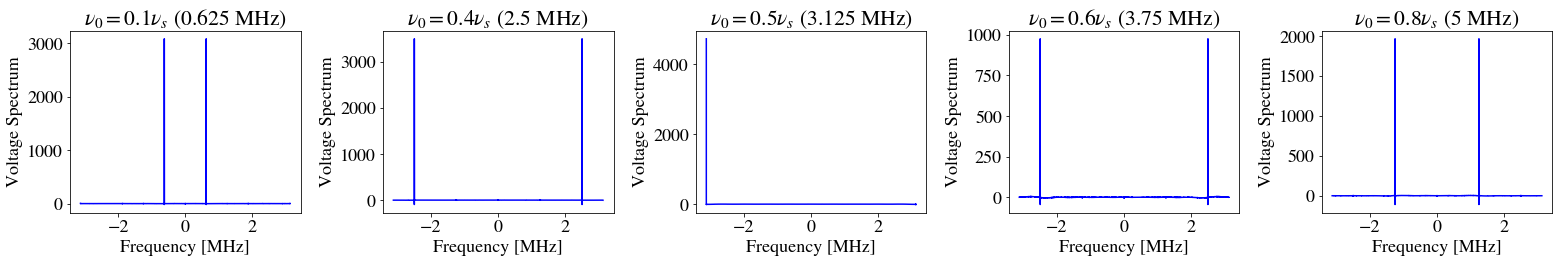

In [6]:
# plt.figure(figsize=(12,8))
# for key in data_dict.keys(): 
#     plt.plot(np.fft.fftfreq(16000, 1/ν_s)/1e6, np.fft.fft(data_df[key]/(2**15)), label=key)
    
# # plt.xlim(0,5)
# plt.legend(loc=(1.05,0.4))
# # plt.ylabel("Volts [V]")
# plt.set_xlabel("Frequency [MHz]")
# plt.show()

fig, axes = plt.subplots(1,5, figsize=(22, 4))

axes[0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["0.625 MHz"]/(2**15))), color="blue")
axes[0].set_xlabel("Frequency [MHz]")
axes[0].set_ylabel("Voltage Spectrum")

axes[1].set_title("$\\nu_0 = 0.4 \\nu_s$ (2.5 MHz)")
axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["2.5 MHz"]/(2**15))), color="blue")
axes[1].set_xlabel("Frequency [MHz]")
axes[1].set_ylabel("Voltage Spectrum")

axes[2].set_title("$\\nu_0 = 0.5 \\nu_s$ (3.125 MHz)")
axes[2].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["3.125 MHz"]/(2**15))), color="blue")
axes[2].set_xlabel("Frequency [MHz]")
axes[2].set_ylabel("Voltage Spectrum")

axes[3].set_title("$\\nu_0 = 0.6 \\nu_s$ (3.75 MHz)")
axes[3].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["3.75 MHz"]/(2**15))), color="blue")
axes[3].set_xlabel("Frequency [MHz]")
axes[3].set_ylabel("Voltage Spectrum")

axes[4].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)")
axes[4].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["5 MHz"]/(2**15))),color="blue")
axes[4].set_xlabel("Frequency [MHz]")
axes[4].set_ylabel("Voltage Spectrum")
fig.tight_layout()
plt.show()

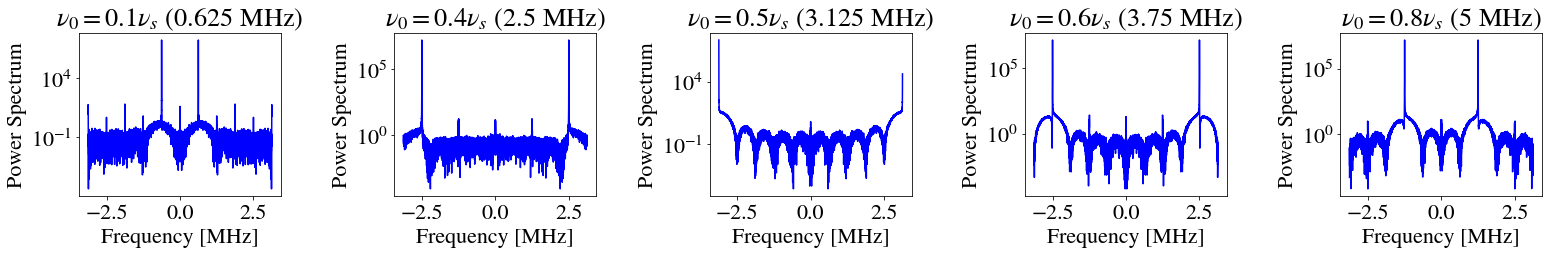

In [102]:
# plt.figure(figsize=(12,8))
# for key in data_dict.keys(): 
#     plt.plot(np.fft.fftfreq(16000, 1/ν_s)/1e6, np.fft.fft(data_df[key]/(2**15)), label=key)
    
# # plt.xlim(0,5)
# plt.legend(loc=(1.05,0.4))
# # plt.ylabel("Volts [V]")
# plt.set_xlabel("Frequency [MHz]")
# plt.show()

fig, axes = plt.subplots(1,5, figsize=(22, 4))

axes[0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["0.625 MHz"]/(2**15))))**2, color="blue")
axes[0].set_xlabel("Frequency [MHz]")
axes[0].set_ylabel("Power Spectrum")
axes[0].semilogy()

axes[1].set_title("$\\nu_0 = 0.4 \\nu_s$ (2.5 MHz)")
axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["2.5 MHz"]/(2**15))))**2, color="blue")
axes[1].set_xlabel("Frequency [MHz]")
axes[1].set_ylabel("Power Spectrum")
axes[1].semilogy()

axes[2].set_title("$\\nu_0 = 0.5 \\nu_s$ (3.125 MHz)")
axes[2].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["3.125 MHz"]/(2**15))))**2, color="blue")
axes[2].set_xlabel("Frequency [MHz]")
axes[2].set_ylabel("Power Spectrum")
axes[2].semilogy()

axes[3].set_title("$\\nu_0 = 0.6 \\nu_s$ (3.75 MHz)")
axes[3].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["3.75 MHz"]/(2**15))))**2, color="blue")
axes[3].set_xlabel("Frequency [MHz]")
axes[3].set_ylabel("Power Spectrum")
axes[3].semilogy()

axes[4].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)")
axes[4].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["5 MHz"]/(2**15))))**2,color="blue")
axes[4].set_xlabel("Frequency [MHz]")
axes[4].set_ylabel("Power Spectrum")
axes[4].semilogy()
fig.tight_layout()
plt.show()

It appears that the $\nu_{s,\mathrm{min}} = 0.5\nu_s = 3.125 \mathrm{MHz}$. This makes sense because the PicoSampler samples at 6.25 MHz with our choice of dividors. The nyquist criterion requires us to have signals with frequencies at most half of that in order to be properly sampled without aliasing. The figures above show this. The left two plots show proper fourier space representation while the right three show aliased frequency values.

In [50]:
import scipy.signal as sig

f = np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6)
p = np.abs((np.fft.fftshift(np.fft.fft(data_df["5 MHz"])/(2**15))))**2

peak_indeces = np.argmax(p)
f[peak_indeces]


# plt.plot((f[peak_indeces[0]]), (p[peak_indeces[0]]), color="red")
# plt.plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
#              np.abs(np.fft.fftshift(np.fft.fft(data_df["0.625 MHz"]/(2**15))))**2, color="blue")
# # plt.semilogy()

-1.2499999999999998

## 5.3 Repeat Measurements for 1 Sine Wave

we need to repeat measurements for 1 sine wave to show results are not just a fluke but in fact what we expect. We will examine the real and imaginary parts of the signal in the fourier domain.

In [237]:
realizations_0p1ν_s = []
for _ in range(5):
    print(_)
    realizations_0p1ν_s.append(ugradio.pico.capture_data("2V", divisor=10)[0,0,:]) #0.625 MHz

0
1
2
3
4


In [244]:
np.save("0.1_nu_s_realizations.npy", np.array(realizations_0p1ν_s))

array_0p1 = np.array(realizations_0p1ν_s)

In [238]:
realizations_0p8ν_s = []
for _ in range(5):
    print(_)
    realizations_0p8ν_s.append(ugradio.pico.capture_data("2V", divisor=10)[0,0,:]) #5 MHz

0
1
2
3
4


In [245]:
np.save("0.8_nu_s_realizations.npy", np.array(realizations_0p8ν_s))

array_0p8 = np.array(realizations_0p8ν_s)

In [272]:
#load in data
array_0p1 = np.load("data/0.1_nu_s_realizations.npy")
array_0p8 = np.load("data/0.8_nu_s_realizations.npy")

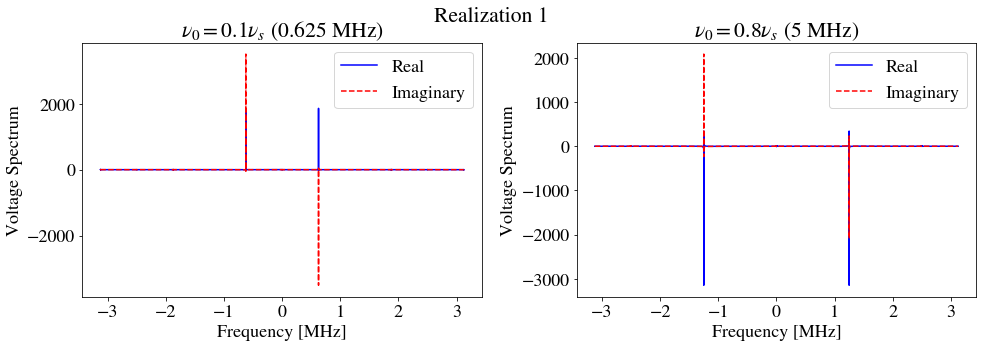

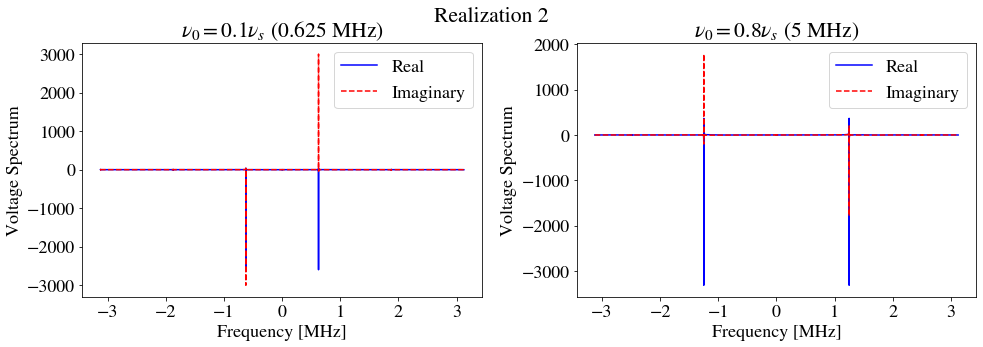

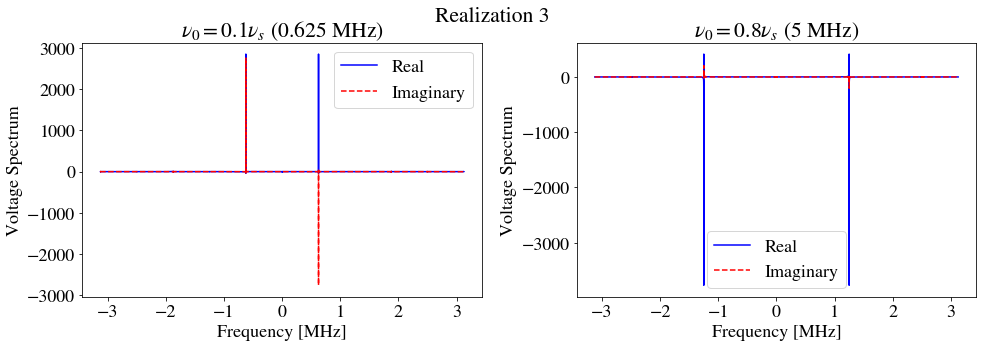

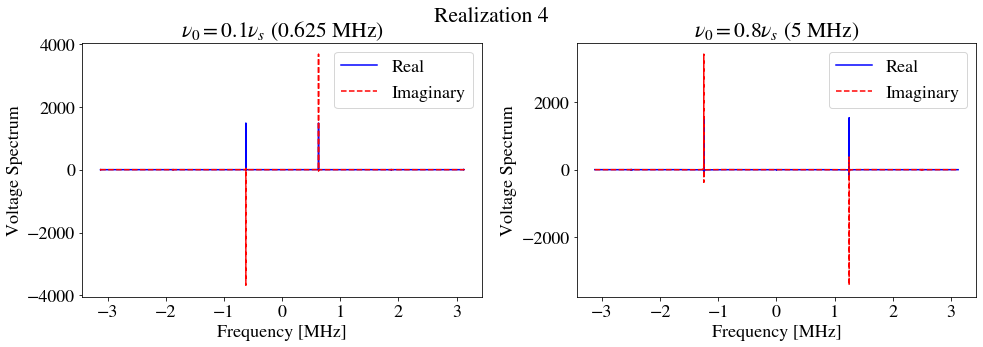

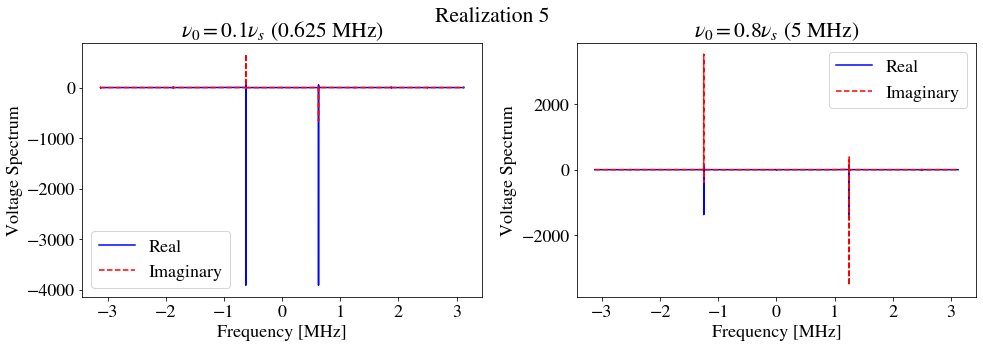

In [8]:
def plot_FT_realizations(index):
    fig, axes = plt.subplots(1,2, figsize=(14, 5))

    fig.suptitle("Realization " + str(index + 1))

    axes[0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
    axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 np.fft.fftshift(np.fft.fft(array_0p1[index,:]/(2**15)).real), color="blue", label="Real")

    axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 np.fft.fftshift(np.fft.fft(array_0p1[index,:]/(2**15)).imag), color="red",linestyle="--", label="Imaginary")

    axes[0].set_xlabel("Frequency [MHz]")
    axes[0].set_ylabel("Voltage Spectrum")
    axes[0].legend()
    


    axes[1].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)")
    axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 np.fft.fftshift(np.fft.fft(array_0p8[index,:]/(2**15)).real), color="blue", label="Real")

    axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 np.fft.fftshift(np.fft.fft(array_0p8[index,:]/(2**15)).imag), color="red", linestyle="--", label="Imaginary")

    axes[1].set_xlabel("Frequency [MHz]")
    axes[1].set_ylabel("Voltage Spectrum")
    axes[1].legend()
    fig.tight_layout()
    plt.show()
    
plot_FT_realizations(0)
plot_FT_realizations(1)
plot_FT_realizations(2)
plot_FT_realizations(3)
plot_FT_realizations(4)

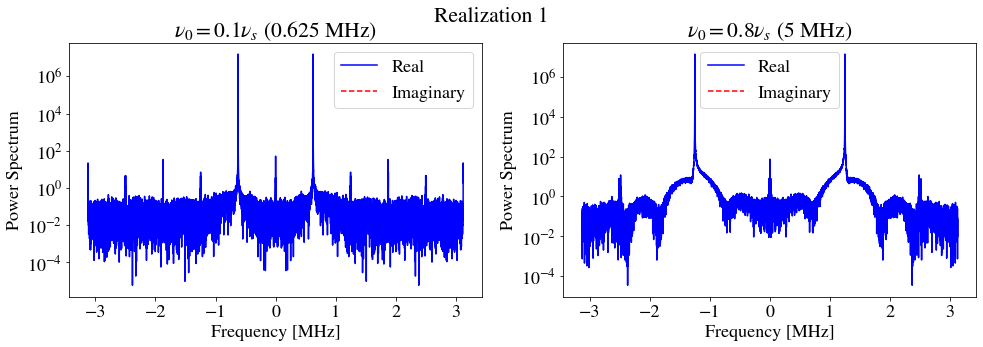

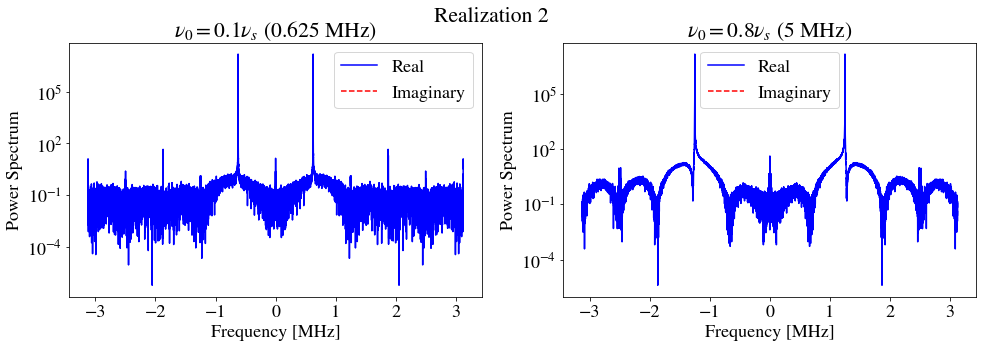

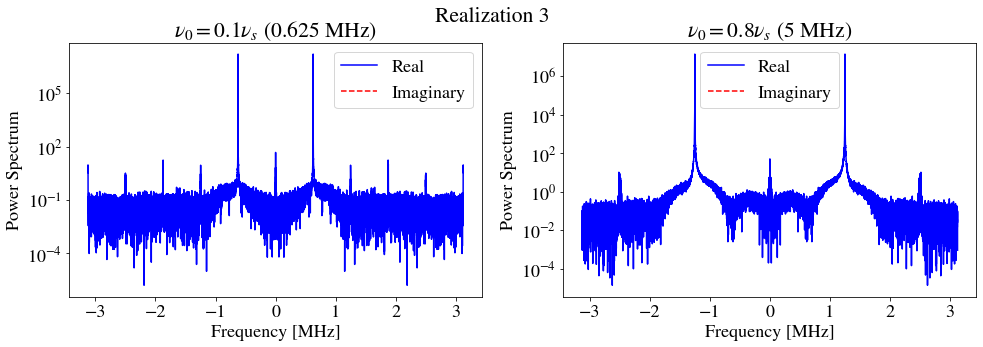

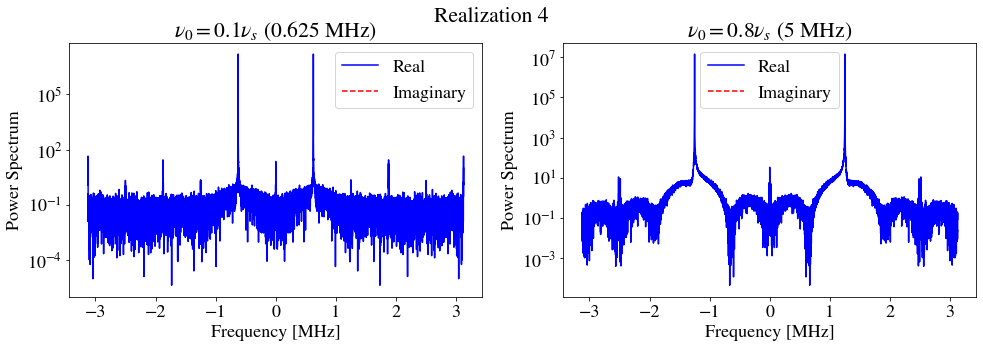

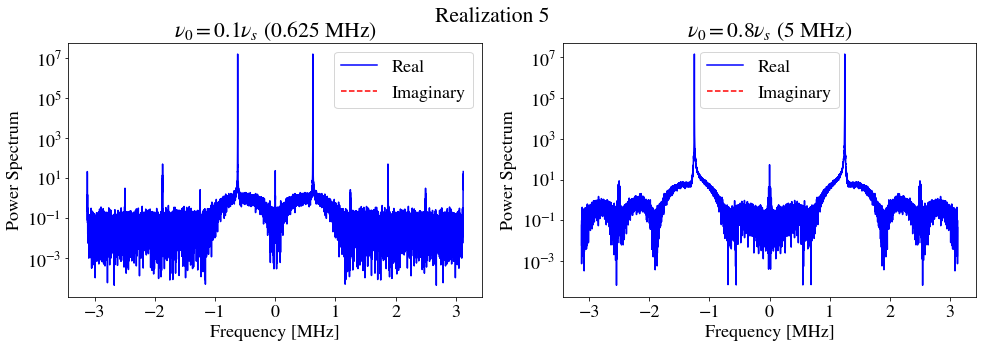

In [9]:
def plot_power_realizations(index):
    fig, axes = plt.subplots(1,2, figsize=(14, 5))

    fig.suptitle("Realization " + str(index + 1))

    axes[0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
    axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 (np.abs(np.fft.fftshift(np.fft.fft(array_0p1[index,:]/(2**15))))**2).real, color="blue", label="Real")

    axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 (np.abs(np.fft.fftshift(np.fft.fft(array_0p1[index,:]/(2**15))))**2).imag, color="red",linestyle="--", label="Imaginary")

    axes[0].set_xlabel("Frequency [MHz]")
    axes[0].set_ylabel("Power Spectrum")
    axes[0].legend()
    axes[0].semilogy()


    axes[1].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)")
    axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 (np.abs(np.fft.fftshift(np.fft.fft(array_0p8[index,:]/(2**15))))**2).real, color="blue", label="Real")

    axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 (np.abs(np.fft.fftshift(np.fft.fft(array_0p8[index,:]/(2**15))))**2).imag, color="red", linestyle="--", label="Imaginary")

    axes[1].set_xlabel("Frequency [MHz]")
    axes[1].set_ylabel("Power Spectrum")
    axes[1].legend()
    axes[1].semilogy()
    fig.tight_layout()
    plt.show()
    
plot_power_realizations(0)
plot_power_realizations(1)
plot_power_realizations(2)
plot_power_realizations(3)
plot_power_realizations(4)

In [326]:
print("Calculating ACF with DFT/np.FFT Manually")
FFT_0p1 = ugradio.dft.dft(array_0p1[0,:]/(2**15))
ACS_dft = ugradio.dft.idft(np.abs(FFT_0p1[1])**2, f=FFT_0p1[0])
ACS_nft = np.fft.fftshift(np.fft.ifft(np.abs(np.fft.fft(array_0p1[0,:]/(2**15)))**2))

Calculating ACF with DFT/np.FFT Manually


In [327]:
print("Calculating ACF with np.correlate & scipy.correlate")
ACS_np = np.correlate(array_0p1[0,:]/(2**15),array_0p1[0,::1]/(2**15), mode='same')
ACS_scipy = sig.correlate(array_0p1[0,:]/(2**15),array_0p1[0,:]/(2**15), mode="same")

Calculating ACF with np.correlate & scipy.correlate


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


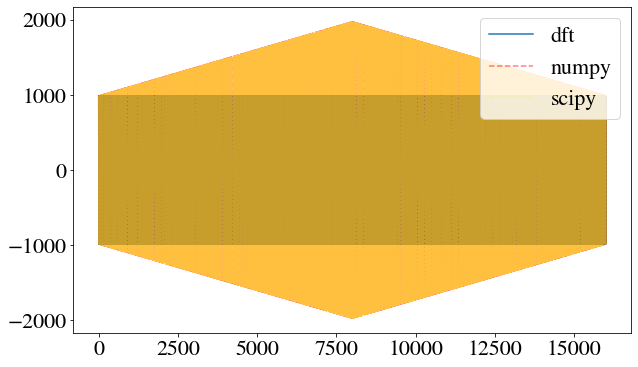

In [328]:
# np.shape(Auto_C_dft)
plt.figure(figsize=(10,6))
plt.plot(ACS_dft[1]/2, label="dft")
# plt.plot(ACS_dft[1]/2 - ACS_nft/2, label="nft")
# plt.plot(ACS_nft/2, label="nft")
plt.plot(ACS_np, linestyle="--",color="red", alpha=0.5, label="numpy")
plt.plot(ACS_scipy, linestyle=":",color="yellow", alpha=0.5, label="scipy")
# plt.xlim(3500,5100)
plt.legend()
# plt.xlim(-100,100)


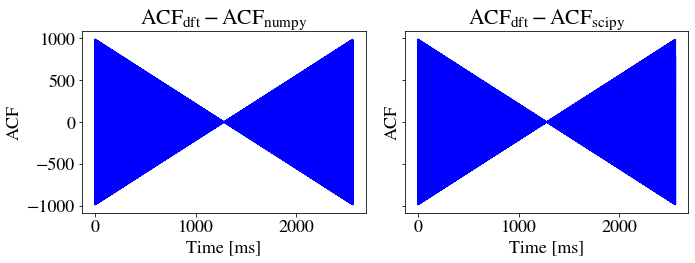

In [96]:
fig, axes = plt.subplots(1,2,sharey=True, figsize=(10,4))

axes[0].plot(times*1e6, ACS_dft[1] - ACS_np, color='blue')
axes[0].set_title("$\\mathrm{ACF}_{\\mathrm{dft}} - \\mathrm{ACF}_{\\mathrm{numpy}}$")
# axes[1].plot(ACS_dft[1] - ACS_dft[1])
# axes[1].set_title("$\\mathrm{ACF}_{\\mathrm{dft}} - \\mathrm{ACF}_{\\mathrm{dft}}$")
axes[1].plot(times*1e6, ACS_dft[1] - ACS_scipy, color='blue')
axes[1].set_title("$\\mathrm{ACF}_{\\mathrm{dft}} - \\mathrm{ACF}_{\\mathrm{scipy}}$")

for i, ax in enumerate(axes):
    ax.set_xlabel("Time [ms]")
    ax.set_ylabel("ACF")

fig.tight_layout()
plt.show()

In [273]:
print("Zero Padding:")
array_0p1_padded = np.zeros(len(array_0p1[0,:]) + 4000)
array_0p1_padded[8000:12000] = array_0p1[0,6000:10000]


print("Calculating ACF with DFT/np.FFT Manually")
FFT_0p1 = ugradio.dft.dft(array_0p1_padded/(2**15))
ACS_dft = ugradio.dft.idft(np.abs(FFT_0p1[1])**2, f=FFT_0p1[0])
ACS_nft = np.fft.fftshift(np.fft.ifft(np.abs(np.fft.fft(array_0p1_padded/(2**15)))**2))

Zero Padding:
Calculating ACF with DFT/np.FFT Manually


In [274]:
print("Calculating ACF with np.correlate & scipy.correlate")
ACS_np = np.correlate(array_0p1_padded/(2**15),array_0p1_padded/(2**15), mode='same')
ACS_scipy = sig.correlate(array_0p1_padded/(2**15),array_0p1_padded/(2**15), mode="same")

Calculating ACF with np.correlate & scipy.correlate


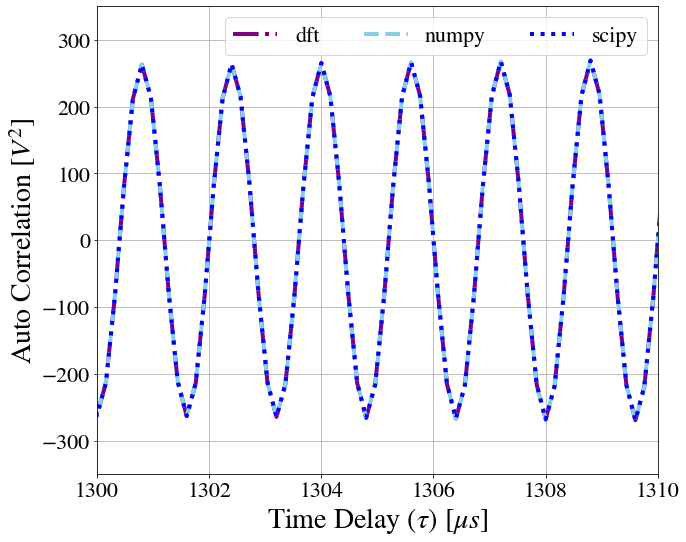

In [325]:
# np.shape(Auto_C_dft)
plt.figure(figsize=(10,8))
tau = np.arange(20000) * Δt * 1e6
plt.plot(tau,ACS_dft[1], linestyle="-.",color="purple",linewidth=4, label="dft")
plt.plot(tau,ACS_np, linestyle="--",color="skyblue",linewidth=4, label="numpy")
plt.plot(tau,ACS_scipy, linestyle=":",color="blue",linewidth=4, label="scipy")
plt.xlim(1300,1310)
plt.ylim(-350,350)
plt.xlabel("Time Delay ($\\tau$) [$\\mu s$]",fontsize=28)
plt.legend(ncol=3)
plt.grid()
plt.ylabel("Auto Correlation [$V^2$]", fontsize=28)
plt.tight_layout()
plt.savefig("ACF.pdf", dpi=300)
plt.show()
# plt.xlim(-100,100)


Note to self for lab write up: The reason there is a discrepancy in ACF between `np.correlate` & `scipy.signal.correlate` with the manual calculation using `dft` and `np.fft.fft` is in the assumptions made about periodicity in the data. Calculating this manually doesn't assume any periodicity in the data, but the underlying functions in the numpy and scipy libraries do assume that there are periodic boundary conditions. To work around this we zero pad the data on the boundaries to make them periodic again. 

# Displaying Aliasing

In [19]:
true_freqs =[0.625, 1.25, 1.875, 2.5, 3.125, 3.75, 4.375, 5, 5.625, 6.25] # MHz
freqs = np.fft.fftfreq(16000, d=Δt*1e6)

# names of all data in dataframe
names =['0.625 MHz', '1.25 MHz', '1.875 MHz', '2.5 MHz', '3.125 MHz', '3.75 MHz', '4.375 MHz', 
        '5 MHz', '5.625 MHz', '6.25 MHz']


data = data_df


peak_freq_vals = np.zeros(len(true_freqs)) + 1

for i in range(len(true_freqs)):
    peak_i = scipy.signal.find_peaks(np.fft.fftshift(np.fft.fft(data[names[i]]/(2**15))).real**2/(10**6), 
                                     threshold=0.00004)
    
    
    if len(peak_i[0]) == 0:
        peak_freq_vals[i] = np.nan
        
    else:
        peak_freq = abs(np.fft.fftshift(freqs)[peak_i[0][0]])
        print(peak_freq)
        peak_freq_vals[i] = peak_freq



0.626171875
1.251953125
1.87734375
2.5035156250000004
3.1207031250000004
2.5
1.879296875
1.25625
0.625
0.0


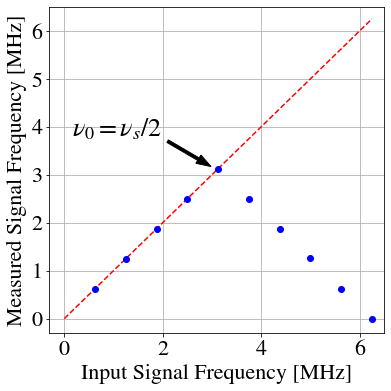

In [91]:
x = np.linspace(0,6.25, 100)
plt.figure(figsize=(6,6))
plt.plot(x, x, 'r--')
plt.plot(true_freqs, peak_freq_vals,linestyle=" ", marker="o", color="blue")
plt.xlabel("Input Signal Frequency [MHz]")
plt.ylabel("Measured Signal Frequency [MHz]")
plt.grid()
plt.text(0.15,3.8, "$\\nu_0 = \\nu_s /2$", fontsize=26)
plt.arrow(2.1, 3.7, 0.625, -0.375, width=0.06,head_width=0.2, color="black")
# plt.xticks(true_freqs)
plt.xlim(-0.3,6.5)
plt.ylim(-0.3,6.5)
plt.savefig("aliasing.pdf", dpi=300)
plt.show()

# 5.4 Leakage Power

In [61]:
# COME BACK AND DO
data=np.load('data/0.1_nu_s_realizations.npy')


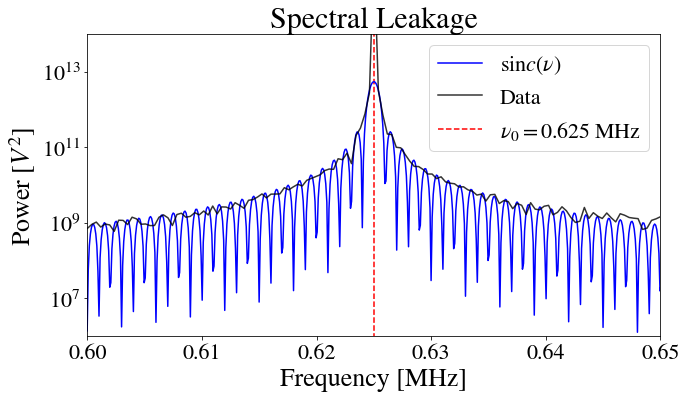

In [62]:
FFT_data = np.fft.fft(data[0,:])
FFT_freqs = np.fft.fftfreq(16000, d = Δt)
x = np.linspace(-1, 2, N*2)

fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.plot(x,5.5e12*np.sinc((x - 0.625)*1000)**2, color="blue", label="$\\sinc(\\nu)$")
# ax.plot(np.fft.fftshift(np.fft.fftfreq(N, d = Δt))/1e6,
#              np.roll(1e1*np.abs(np.fft.fftshift(np.fft.fft(tophat(x,width=5000, amp=1000))))**2 + 1e6, 1600),
#             alpha=0.5, color="blue", label="Sinc($\\nu$)")

ax.plot(np.fft.fftshift(FFT_freqs) / 1e6, np.abs(np.fft.fftshift(FFT_data))**2, color="black",alpha=0.8, label="Data")
ax.vlines(x = 0.625, ymin = 0, ymax = 1e18, linestyle = '--', color="red", label="$\\nu_0 = 0.625 \; \\mathrm{MHz}$")
ax.vlines(x = -0.625, ymin = 0, ymax = 1e18, linestyle = '--')

ax.legend()
ax.set_ylim(1e6, 1e14)
# ax.set_ylim(1e6, 1e8)
ax.set_xlim(0.6, 0.65)
# plt.plot(x, np.sinc((x - 0.625)*10)*1e9 + 1e7)
ax.set_title("Spectral Leakage", fontsize=30)
ax.set_xlabel("Frequency [MHz]", fontsize=26)
ax.set_ylabel("Power [$V^2$]", fontsize=26)

ax.semilogy()
fig.tight_layout()
# fig.savefig("spectral_leakage.pdf", dpi=300)
plt.show()

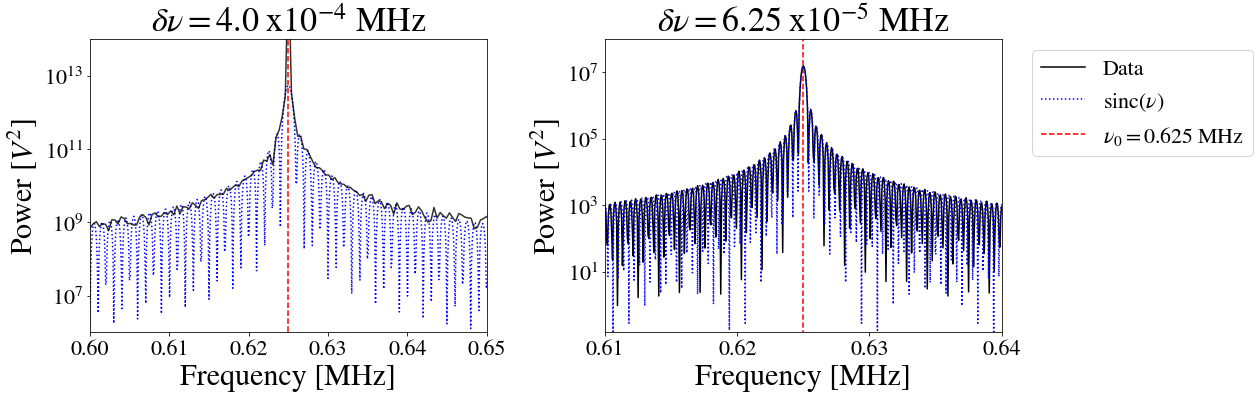

In [113]:
FFT_data = np.fft.fft(data[0,:])
FFT_freqs = np.fft.fftfreq(16000, d = Δt)
x = np.linspace(-1, 2, N*2)

fig, ax = plt.subplots(1,2, figsize=(18,6))
ax[0].plot(x,5.5e12*np.sinc((x - 0.625)*1000)**2, color="blue", linestyle=":", label="$\\sinc(\\nu)$")
# ax.plot(np.fft.fftshift(np.fft.fftfreq(N, d = Δt))/1e6,
#              np.roll(1e1*np.abs(np.fft.fftshift(np.fft.fft(tophat(x,width=5000, amp=1000))))**2 + 1e6, 1600),
#             alpha=0.5, color="blue", label="Sinc($\\nu$)")

ax[0].plot(np.fft.fftshift(FFT_freqs) / 1e6, np.abs(np.fft.fftshift(FFT_data))**2, color="black",alpha=0.8, label="Data")
ax[0].vlines(x = 0.625, ymin = 0, ymax = 1e18, linestyle = '--', color="red", label="$\\nu_0 = 0.625 \; \\mathrm{MHz}$")
ax[0].vlines(x = -0.625, ymin = 0, ymax = 1e18, linestyle = '--')

# ax[0].legend()
ax[0].set_ylim(1e6, 1e14)
# ax.set_ylim(1e6, 1e8)
ax[0].set_xlim(0.6, 0.65)
# plt.plot(x, np.sinc((x - 0.625)*10)*1e9 + 1e7)
ax[0].set_title("$\\delta \\nu = 4.0 \mathrm{\; x} 10^{-4}$ MHz", fontsize=34)
ax[0].set_xlabel("Frequency [MHz]", fontsize=30)
ax[0].set_ylabel("Power [$V^2$]", fontsize=30)

ax[0].semilogy()
# fig.tight_layout()
# fig.savefig("spectral_leakage.pdf", dpi=300)
# plt.show()


# ref = data['0.625 MHz']
# plt.figure(figsize=(10,6))
fourier=np.load('data/Fourier_100k_samples.npy')[0]
power=np.load('data/Power_100k_samples.npy')
# ref_power_fft = calc_power_fft(ref)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
ax[1].plot(fourier/1e6, power, color='black', label="Data")
ax[1].vlines(x = 0.625, ymin = 0, ymax = 1e18, linestyle = '--', color="red", label="$\\nu_0 = 0.625 \; \\mathrm{MHz}$")
x=np.linspace(0.61,0.64,1000)
ax[1].plot(x,1.5e7*np.sinc((x-0.625)*2500)**2,color="blue", linestyle=":",label='sinc($\\nu$)')
# plt.plot(freq, np.sin(6*freq)/(freq) + .75, "r--", label="$sin(x)/x$")
ax[1].semilogy()
ax[1].set_xlim(0.61, 0.64)
ax[1].set_ylim(.15, 100000000)
# plt.xlim(0.62, 0.63)
ax[1].set_xlabel("Frequency [MHz]", fontsize=30)
ax[1].set_ylabel("Power [$V^2$]", fontsize=30)
ax[1].set_title("$\\delta \\nu = 6.25 \mathrm{\; x} 10^{-5}$ MHz", fontsize=34)
ax[1].legend(bbox_to_anchor=(1.05,1.0), loc="upper left")
fig.tight_layout()
plt.savefig("spectral_leakage_res.pdf", dpi=300)
# plt.grid()

In [84]:
print(np.diff(FFT_freqs/1e6))

[0.00039062 0.00039062 0.00039062 ... 0.00039063 0.00039062 0.00039062]


In [87]:
print("resolution = ", (np.diff(FFT_freqs/1e6))[0], "MHz")
print("resolution = ", (np.diff(fourier.real/1e6))[0], "MHz")

resolution =  0.00039062499999999997 MHz
resolution =  6.249999999985434e-05 MHz


In [ ]:



plt.figure(figsize=(10,6))
fourier=np.load('data/Fourier_100k_samples.npy')[0]
power=np.load('data/Power_100k_samples.npy')
# ref_power_fft = calc_power_fft(ref)
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
plt.plot(fourier/1e6, power, color='black', label="Data")
plt.vlines(x = 0.625, ymin = 0, ymax = 1e18, linestyle = '--', color="red", label="$\\nu_0 = 0.625 \; \\mathrm{MHz}$")
x=np.linspace(0.61,0.64,1000)
plt.plot(x,1.5e7*np.sinc((x-0.625)*2500)**2,color="blue", linestyle=":",label='sinc($\\nu$)')
# plt.plot(freq, np.sin(6*freq)/(freq) + .75, "r--", label="$sin(x)/x$")
plt.yscale('log')
plt.xlim(0.61, 0.64)
plt.ylim(.15, 100000000)
# plt.xlim(0.62, 0.63)
plt.xlabel("Frequency [MHz]", fontsize=30)
plt.ylabel("Power [$V^2$]", fontsize=30)
plt.title("Spectral Leakage", fontsize=34)
plt.legend()

# 5.5 Frequency Resolution

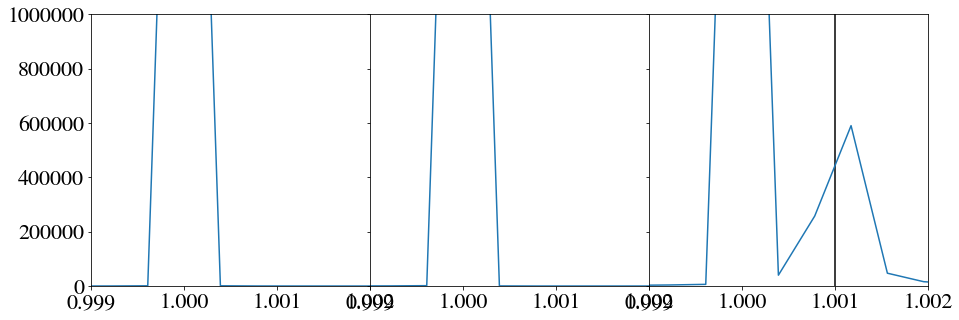

In [58]:
tenth = np.load('data/tenth.npy')
tenth = tenth[0,0,:] 
hundredth = np.load('data/hundredth.npy')
hundredth = hundredth[0,0,:]
thousandth = np.load('data/thousandth.npy')
thousandth = thousandth[0,0,:]

res_data = [tenth, hundredth, thousandth]

fig, axes = plt.subplots(1, 3,sharey=True, figsize=(15,5))

for i, ax in enumerate(axes):
    data = res_data[i] / 2**15
    fft = np.fft.fft(data[:])
    shift_fft = np.fft.fftshift(fft)
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=Δt))
    power_fft = np.abs(shift_fft) ** 2
    
    ax.plot(freq / 1e6, power_fft)
    
    ax.set_xlim(0.999,1.002)


axes[2].vlines(x=1.001, ymin=0, ymax=1e10)
axes[2].set_ylim(0,1e6)
fig.subplots_adjust(wspace=0, hspace=0)

In [11]:
N = 16000
vs
Fourier_high_res=ugradio.dft.dft(thousandth / 2**15,t = np.linspace(-N/(2.0*vs),N/(2.0*vs),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=32000,endpoint=False),vsamp=6.25e6)
Fourier1=ugradio.dft.dft(thousandth / 2**15,t = np.linspace(-N/(2.0*vs),N/(2.0*vs),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=8000,endpoint=False),vsamp=6.25e6)


NameError: name 'vs' is not defined

In [14]:
import ugradio
vsamp = 6.25e6
N = 16000
thousandth_v = thousandth[0][0]/2**15
# fs = np.linspace(-vs/2.,vs/2.,num=N,endpoint=False)
Fourier = ugradio.dft.dft(thousandth_v,t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=16000,endpoint=False),vsamp=6.25e6)

# print(len(np.linspace(-N/(2.0*vs),N/(2.0*vs),num=N,endpoint=False)))
# Fourier_50000=ugradio.dft.dft(thousandth_v,vsamp=vs)
# Fourier1=ugradio.dft.dft(data[0,:][0,:]/2**15,t = np.linspace(-N/(2.0*vs),N/(2.0*vs),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=50000,endpoint=False),vsamp=6.25e6)
Fourier_32000=ugradio.dft.dft(thousandth_v,t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=32000,endpoint=False),vsamp=6.25e6)
Fourier_64000=ugradio.dft.dft(thousandth_v,t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=64000,endpoint=False),vsamp=6.25e6)


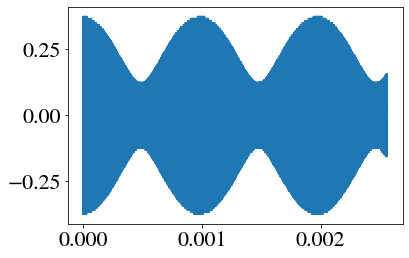

In [33]:
plt.plot(np.arange(len(thousandth_v)) * Δt, thousandth_v)


In [50]:
print(np.mean(np.diff(Fourier[0]/1e6)))
print(np.mean(np.diff(Fourier_32000[0]/1e6)))
print(np.mean(np.diff(Fourier_64000[0]/1e6)))


0.000390625
0.00019531250000000004
9.765624999999999e-05


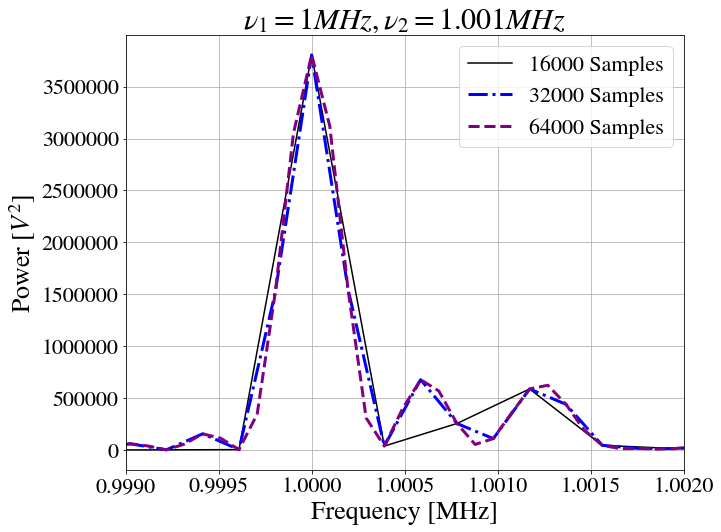

In [51]:
plt.figure(figsize=(10,8))
plt.plot(Fourier[0]/1e6, np.abs(Fourier[1])**2, 'k-',label='16000 Samples')
# plt.plot(Fourier_32000[0], np.abs(Fourier_32000[1])**2, label='32000 samples')
plt.plot(Fourier_32000[0]/1e6, np.abs(Fourier_32000[1])**2,'b',linestyle="-.", linewidth=3,label='32000 Samples')
plt.plot(Fourier_64000[0]/1e6, np.abs(Fourier_64000[1])**2, 'purple', linestyle="--",linewidth=3,label='64000 Samples')
plt.grid()
plt.xlabel("Frequency [MHz]", fontsize=26)
plt.ylabel("Power [$V^2$]", fontsize=26)
plt.title("$\\nu_1 = 1 MHz, \\nu_2 = 1.001 MHz$", fontsize=30)
plt.xlim(0.999, 1.002)
plt.legend()

(0.995, 1.005)

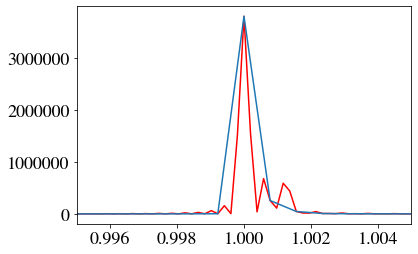

In [417]:
power_thou_high_res = np.abs(Fourier[1])**2
power_thou_def = np.abs(Fourier1[1])**2

#RAPH DATA

plt.plot(Fourier[0]/1e6, power_thou_high_res, color='red')
plt.plot(Fourier1[0]/1e6, power_thou_def)
plt.xlim(0.995,1.005)



# 5.6 Nyquist Windows

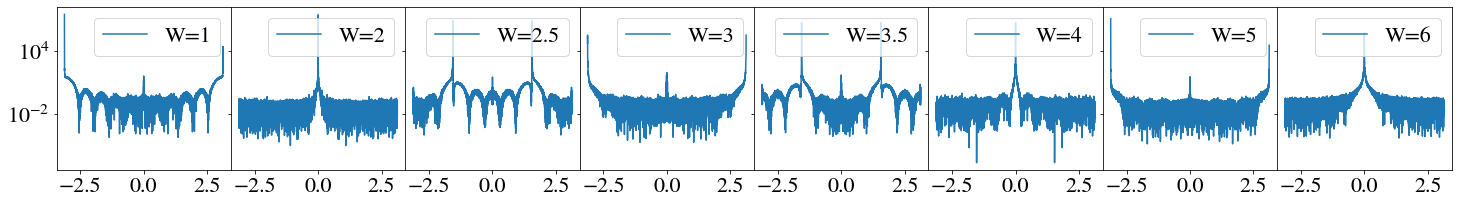

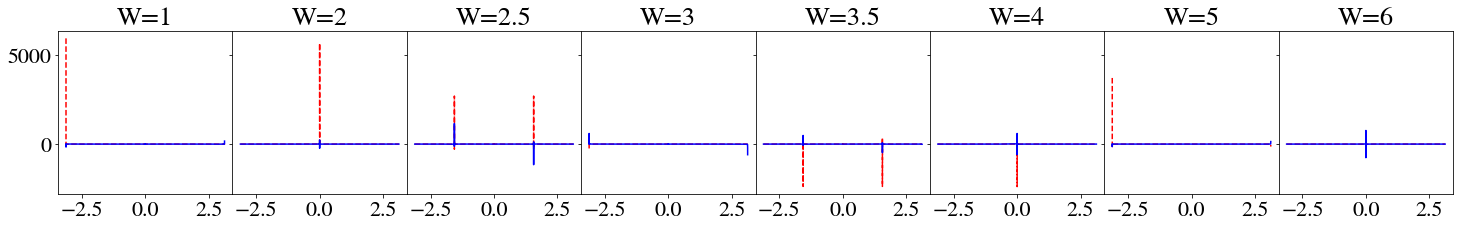

In [58]:
window_1 = np.load('data/nyquist_window_1.npy')
window_2 = np.load('data/nyquist_window_2.npy')
window_3 = np.load('data/nyquist_window_3.npy')
window_4 = np.load('data/nyquist_window_4.npy')
window_5 = np.load('data/nyquist_window_5.npy')
window_6 = np.load('data/nyquist_window_6.npy')
window_2_5 = np.load('data/nyquist_window_2_5.npy')
window_3_5 = np.load('data/nyquist_window_3_5.npy')

windows = [window_1, window_2, window_2_5, window_3, window_3_5, window_4, window_5, window_6]
labels = ['W=1', 'W=2','W=2.5', 'W=3', 'W=3.5','W=4', 'W=5', 'W=6', ]

# windows = [window_4, window_5, window_6]
# labels=['W=4', 'W=5', 'W=6']

fig, axes = plt.subplots(1, len(labels),sharey=True, figsize=(25, 3))
for i in range(len(windows)):
    
    data = windows[i] / 2**15
    fft = np.fft.fft(data[0][0][:])
    shift_fft = np.fft.fftshift(fft)
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
    power_fft = np.abs(shift_fft) ** 2
    axes[i].plot(freq, power_fft, label=labels[i])
    axes[i].legend()
    axes[i].semilogy()
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

fig, axes = plt.subplots(1, len(labels),sharey=True, figsize=(25, 3))
for i in range(len(windows)):
    
    data = windows[i] / 2**15
    fft = np.fft.fft(data[0][0][:])
    shift_fft = np.fft.fftshift(fft)
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
#     power_fft = np.abs(shift_fft) ** 2
    axes[i].set_title(labels[i])
    axes[i].plot(freq, shift_fft.real, color="red", linestyle="--")
    axes[i].plot(freq, shift_fft.imag, color="blue")
#     axes[i].semilogy()
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

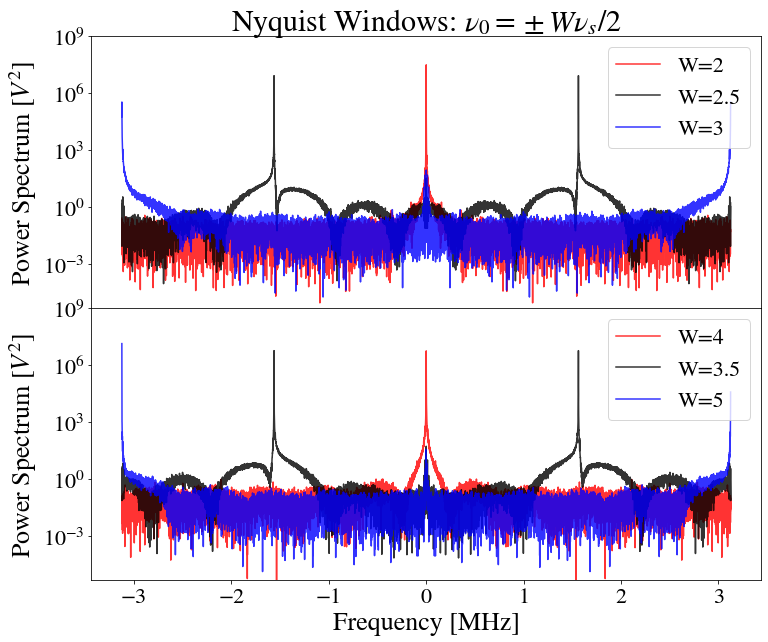

In [96]:
windows_row0 = [window_2, window_2_5, window_3]
labels_row0=['W=2', 'W=2.5', 'W=3']

windows_row1 = [window_4, window_3_5, window_5]
labels_row1=['W=4', 'W=3.5', 'W=5']
colors = ["red", "black", "blue"]

fig, axes = plt.subplots(2,1,sharex=True, figsize=(12, 10))
for j in range(len(windows_row0)):
    data = windows_row0[j] / 2**15
    fft = np.fft.fft(data[0][0][:])
    shift_fft = np.fft.fftshift(fft)
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
    power_fft = np.abs(shift_fft) ** 2
    axes[0].plot(freq, power_fft, alpha=0.8,color=colors[j],label=labels_row0[j])
    axes[0].legend(loc='upper right')
    axes[0].semilogy()

for j in range(len(windows_row1)):
    data = windows_row1[j] / 2**15
    fft = np.fft.fft(data[0][0][:])
    shift_fft = np.fft.fftshift(fft)
    freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
    power_fft = np.abs(shift_fft) ** 2
    axes[1].plot(freq, power_fft, alpha=0.8,color=colors[j],label=labels_row1[j])
    axes[1].legend(loc='upper right')
    axes[1].semilogy()
    

axes[0].set_title("Nyquist Windows: $ \\nu_0 = \\pm W \\nu_s /2$", fontsize=30)
axes[1].set_xlabel("Frequency [MHz]", fontsize=26)
axes[1].set_ylabel("Power Spectrum [$V^2$]", fontsize=26) 
axes[0].set_ylabel("Power Spectrum [$V^2$]", fontsize=26) 
axes[0].set_ylim(5e-6,1e9)
axes[1].set_ylim(5e-6,1e9)
# axes[0].grid()
# axes[1].grid()
fig.subplots_adjust(wspace=0, hspace=0)
# fig.t
plt.savefig("Nyquist Windows.pdf", dpi=300)
# fig


# 5.7 - Fourier Transforms of Noise

In [124]:
data_02 = ugradio.pico.capture_data("200mV", divisor=10, nsamples=16000, nblocks=2)
data_04 = ugradio.pico.capture_data("200mV", divisor=10, nsamples=16000, nblocks=4)
data_08 = ugradio.pico.capture_data("200mV", divisor=10, nsamples=16000, nblocks=8)
data_16 = ugradio.pico.capture_data("200mV", divisor=10, nsamples=16000, nblocks=16)

In [170]:
data_16 = np.load("data/blocks_16.npy")
data_100 = np.load("data/blocks_100.npy")

We need to show the distribution of data is gaussian with width = rms of the data. We show that below

In [261]:
def gaussian(x, A, μ, σ):
    """Theoretical Gaussian Function"""
    return A * np.exp(-(x - μ)**2 / (2 * σ**2))

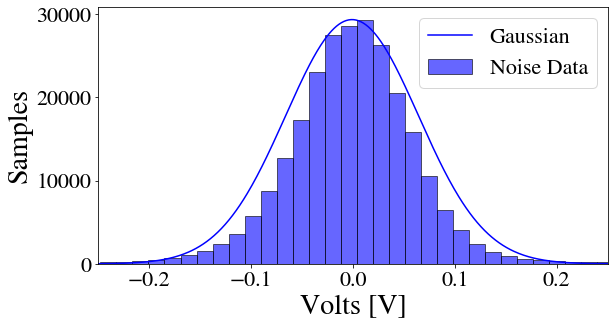

In [270]:
x_lin =np.linspace(-0.6, 0.6, 1000)
nbins = 80
plt.figure(figsize=(9,5))
plt.hist(data_16.flatten()/2**15, bins=nbins, alpha=0.6,label="Noise Data", color="blue",edgecolor='black')
plt.plot(x_lin, gaussian(x_lin, np.max(np.histogram(data_16.flatten()/2**15, bins=nbins)[0]), mean,
                         np.std(data_16.flatten()/2**15)),color="blue", label="Gaussian")

# plt.hist(data_08.flatten()/2**15, bins=nbins, alpha=0.6, label="$N_{\mathrm{blocks}} = 8$", color="purple")
# plt.plot(x_lin, gaussian(x_lin, np.max(np.histogram(data_08.flatten()/2**15, bins=nbins)[0]), 0,
#                          np.std(data_08.flatten()/2**15)),color="purple")

# plt.hist(data_04.flatten()/2**15, bins=nbins, alpha=0.6, label="$N_{\mathrm{blocks}} = 4$", color="red")
# plt.plot(x_lin, gaussian(x_lin, np.max(np.histogram(data_04.flatten()/2**15, bins=nbins)[0]), 0,
#                          np.std(data_04.flatten()/2**15)),color="red")

# plt.hist(data_02.flatten()/2**15, bins=nbins, alpha=0.6, label="$N_{\mathrm{blocks}} = 2$", color="yellow")
# plt.plot(x_lin, gaussian(x_lin, np.max(np.histogram(data_02.flatten()/2**15, bins=nbins)[0]), 0,
#                          np.std(data_02.flatten()/2**15)),color="yellow")
plt.legend()
plt.xlim(-0.25, 0.25)
plt.xlabel("Volts [V]", fontsize=28)
plt.ylabel("Samples", fontsize=28)
plt.tight_layout()
plt.savefig("gaussian.pdf", dpi=300)
plt.show()

In [122]:
mean = np.mean(data_16.flatten()/2**15)
sigma = np.std(data_16.flatten()/2**15)

print(mean, sigma)

-0.0009473876953125 0.06522716629481276


In [123]:
np.sqrt(np.mean((data_16.flatten()/2**15)**2))

0.06523404606719091

### Save Noise Data

In [186]:
np.save("blocks_2.npy", data_02)
np.save("blocks_4.npy", data_04)
np.save("blocks_8.npy", data_08)
np.save("blocks_16.npy", data_16)

In [37]:
data_02 = np.load("data/blocks_2.npy")
data_04 = np.load("data/blocks_4.npy")
data_08 = np.load("data/blocks_8.npy")
data_16 = np.load("data/blocks_16.npy")

In [192]:
print(data_02.shape)
print(data_04.shape)
print(data_08.shape)
print(data_16.shape)

(1, 2, 16000)
(1, 4, 16000)
(1, 8, 16000)
(1, 16, 16000)


### 100 Blocks bit

In [38]:
def calc_power_fft(arr):
    fft = np.fft.fft(arr/2**15)
    shift_fft = np.fft.fftshift(fft)
    power_fft = np.abs(shift_fft) ** 2
    return power_fft

In [39]:
import matplotlib as mpl
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

(1, 100, 16000)


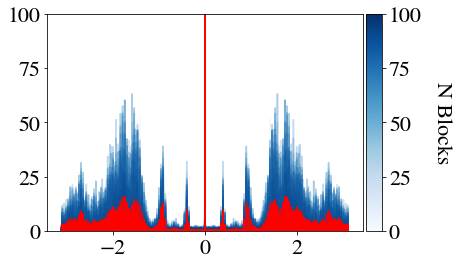

In [179]:
hundred_blocks = np.load("data/blocks_100.npy")
freq = np.fft.fftshift(np.fft.fftfreq(16000, d=1/6.25))
print(hundred_blocks.shape)

cmap = plt.cm.Blues #choose cmap
n = 100 #number of colormap sample points to choose from
colors = cmap(np.linspace(0.2,1,n)) # sampling n different colors from the colormap
fig, ax = plt.subplots(1,1)
avg = np.zeros(16000)
for i in range(100):
    power_fft = calc_power_fft(hundred_blocks[0][i][:])
    ax.plot(freq, power_fft,color=colors[i],alpha = 1-i/100, label=str(i))
    avg += power_fft
# plt.yscale('log')

norm_scaling = mpl.colors.Normalize(vmin=0, vmax=100) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("N Blocks",rotation=270,labelpad=30) #give cbar a label and rotate it 
# plt.legend()
ax.plot(freq, avg/100, color="red")

ax.set_ylim(0,100)
plt.show()

16000


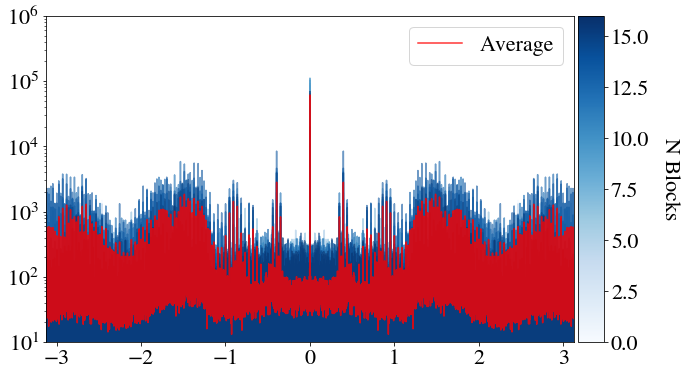

In [225]:


cmap = plt.cm.Blues #choose cmap
n = 16 #number of colormap sample points to choose from
colors = cmap(np.linspace(0,1,n)) # sampling n different colors from the colormap
fig, ax = plt.subplots(1,1, figsize=(10,6))
avg = np.zeros(16000)
for i in range(16):
    power_fft = calc_power_fft(data_16[0][i][:])
    
    ax.plot(freq, power_fft,color=colors[i],alpha = 1-i/32)
    avg += power_fft
# plt.yscale('log')

norm_scaling = mpl.colors.Normalize(vmin=0, vmax=16) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("N Blocks",rotation=270,labelpad=30) #give cbar a label and rotate it 
# plt.legend()
ax.plot(freq, avg/16, color="red", alpha = 0.8, label="Average")
ax.legend()
ax.semilogy()
ax.set_xlim(-3.125, 3.125)
ax.set_ylim(1e1,1e6)
plt.show()

In [194]:
avg_02 = np.mean(calc_power_fft(data_16[0,:2,:]), axis=0)
avg_04 = np.mean(calc_power_fft(data_16[0,:4,:]), axis=0)
avg_08 = np.mean(calc_power_fft(data_16[0,:8,:]), axis=0)
avg_16 = np.mean(calc_power_fft(data_16[0,:,:]), axis=0)

# power_fft_02 = calc_power_fft(data_16[0][0][:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


Text(0, 0.5, 'Power Spectrum [$V^2$]')

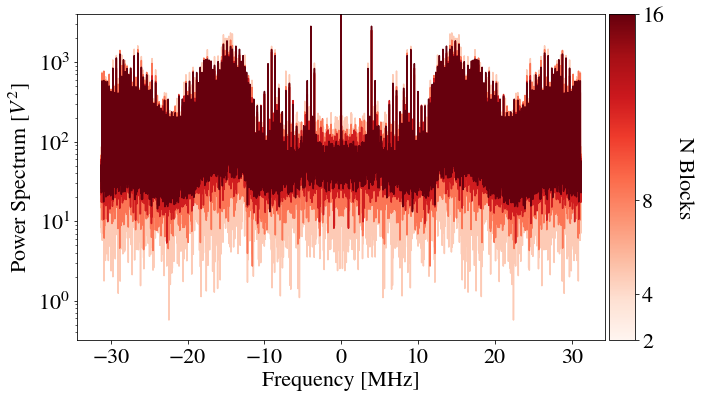

In [201]:
cmap = plt.cm.Reds #choose cmap
n = 4 #number of colormap sample points to choose from
colors = cmap(np.linspace(0.2,1,n)) # sampling n different colors from the colormap

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(freq*10, avg_02, color=colors[0])
ax.plot(freq*10, avg_04, color=colors[1])
ax.plot(freq*10, avg_08, color=colors[2])
ax.plot(freq*10, avg_16, color=colors[3])
ax.semilogy()
norm_scaling = mpl.colors.Normalize(vmin=2, vmax=16) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax, ticks=[2,4,8,16])
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("N Blocks",rotation=270,labelpad=30) #give cbar a label and rotate it 
ax.set_ylim(0,4000)
ax.set_xlabel("Frequency [MHz]")
ax.set_ylabel("Power Spectrum [$V^2$]")


In [202]:
indices = np.where(np.logical_and(freq > 1.2, freq < 1.8))

#SNR = mean/std 

print(np.mean(avg_02[indices])/ np.std(avg_02[indices]))
print(np.mean(avg_04[indices])/ np.std(avg_04[indices]))
print(np.mean(avg_08[indices])/ np.std(avg_08[indices]))
print(np.mean(avg_16[indices])/ np.std(avg_16[indices]))

0.5155750624669093
0.5808258361560814
0.6574857574281835
0.6208479392139787


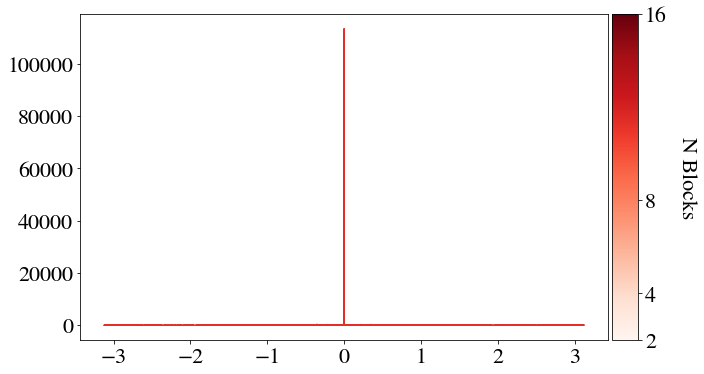

In [46]:
cmap = plt.cm.Reds #choose cmap
n = 4 #number of colormap sample points to choose from
colors = cmap(np.linspace(0,1,n)) # sampling n different colors from the colormap
calc_power_fft(data_02[0,1,:])


fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(freq/1e6, avg_02, color=colors[2])


norm_scaling = mpl.colors.Normalize(vmin=2, vmax=16) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax, ticks=[2,4,8,16])
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("N Blocks",rotation=270,labelpad=30) #give cbar a label and rotate it 


In [267]:
print(np.max(avg_02)/np.std(avg_02))
print(np.max(avg_04)/np.std(avg_04))
print(np.max(avg_08)/np.std(avg_08))
print(np.max(avg_16)/np.std(avg_16))

126.46905682605423
25.997077768883617
62.73403087435085
123.9527312082365


In [44]:
print(np.sqrt(np.mean(avg_02**2)))
print(np.sqrt(np.mean(avg_04**2)))
print(np.sqrt(np.mean(avg_08**2)))
print(np.sqrt(np.mean(avg_16**2)))

898.39940494987
262.6097352846039
271.97482053355526
499.3988216813407


In [157]:
fake_data = np.random.normal(0, 0.065, 16000)
fake_data2 = np.random.normal(0, 0.065, 16000)

fake_data_list = [np.random.normal(0, 0.065, 16000) for i in range(16)]
fake_power_list = []
ave = 0
for i in range(16):
    p = calc_power_fft(fake_data_list[i])
    ave += p
    
    if i == 1:
        fake_power_list.append(ave/(i+1))
    elif i == 3:
        fake_power_list.append(ave/(i+1))
    elif i == 7:
        fake_power_list.append(ave/(i+1))
    elif i == 15:
        fake_power_list.append(ave/(i+1))

In [158]:
len(fake_power_list)

4

mean:  1.2394175514487924e-07 std:  8.642812608577233e-08
mean:  8.2760477798048e-08 std:  4.1202156507793966e-08
mean:  7.139818279185681e-08 std:  2.5061280562228847e-08
mean:  6.705084871497862e-08 std:  1.671081062737688e-08


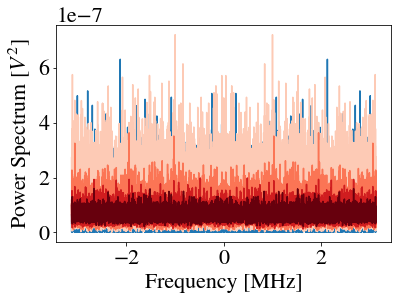

In [168]:
power = calc_power_fft(fake_data)
power2 = calc_power_fft(fake_data2)


ave_fake = (power + power2) / 2
plt.plot(freq,power)
for i in range(4):
    plt.plot(freq,fake_power_list[i], color=colors[i])
    print("mean: ",np.mean(fake_power_list[i]), "std: ", np.std(fake_power_list[i]))

# plt.semilogy()
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power Spectrum [$V^2$]")
plt.show()

In [140]:
fake_data

array([-0.00100854,  0.00694205, -0.05869624, ..., -0.01957885,
       -0.03157524,  0.1253005 ])

In [210]:
data_16_new = ugradio.pico.capture_data("50mV", nblocks=16, divisor=1) 

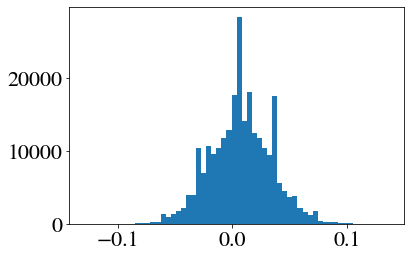

In [217]:
plt.hist(data_16_new.flatten()/2**16, bins=60)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


Text(0, 0.5, 'Power Spectrum [$V^2$]')

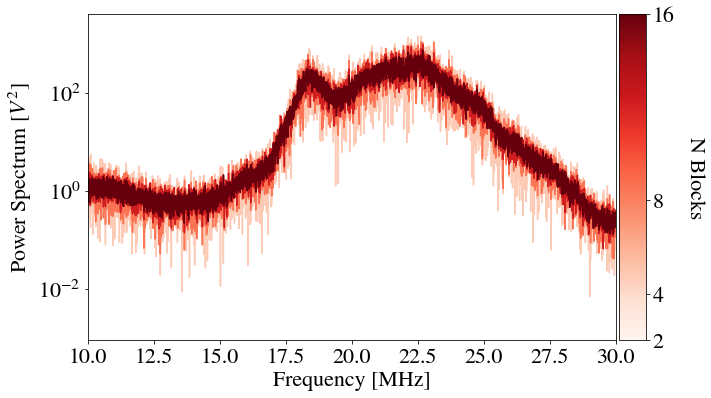

In [230]:
avg_02 = np.mean(calc_power_fft(data_16_new[0,:2,:]), axis=0)
avg_04 = np.mean(calc_power_fft(data_16_new[0,:4,:]), axis=0)
avg_08 = np.mean(calc_power_fft(data_16_new[0,:8,:]), axis=0)
avg_16 = np.mean(calc_power_fft(data_16_new[0,:,:]), axis=0)

cmap = plt.cm.Reds #choose cmap
n = 4 #number of colormap sample points to choose from
colors = cmap(np.linspace(0.2,1,n)) # sampling n different colors from the colormap

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(freq*10, avg_02, color=colors[0])
ax.plot(freq*10, avg_04, color=colors[1])
ax.plot(freq*10, avg_08, color=colors[2])
ax.plot(freq*10, avg_16, color=colors[3])
ax.semilogy()
norm_scaling = mpl.colors.Normalize(vmin=2, vmax=16) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax, ticks=[2,4,8,16])
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), ax=ax) #create color bar object
cbar.set_label("N Blocks",rotation=270,labelpad=30) #give cbar a label and rotate it 
ax.set_ylim(0,4000)
ax.set_xlim(10,30)
ax.set_xlabel("Frequency [MHz]")
ax.set_ylabel("Power Spectrum [$V^2$]")


In [228]:
indices = np.where(np.logical_and(freq*10 > 20, freq*10 < 22.5))

#SNR = mean/std 

print(np.mean(avg_02/avg_16)/ np.std(avg_02/avg_16))
print(np.mean(avg_04/avg_16)/ np.std(avg_04/avg_16))
print(np.mean(avg_08/avg_16)/ np.std(avg_08/avg_16))
print(np.mean(avg_16)/ np.std(avg_16))

1.5388535222986575
2.354951727474622
4.087427134380298
0.10595305726406803


In [222]:
np.save("final_noise_data.npy", data_16_new)

In [231]:
data_100_new = ugradio.pico.capture_data("50mV", nblocks=100, divisor=1) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


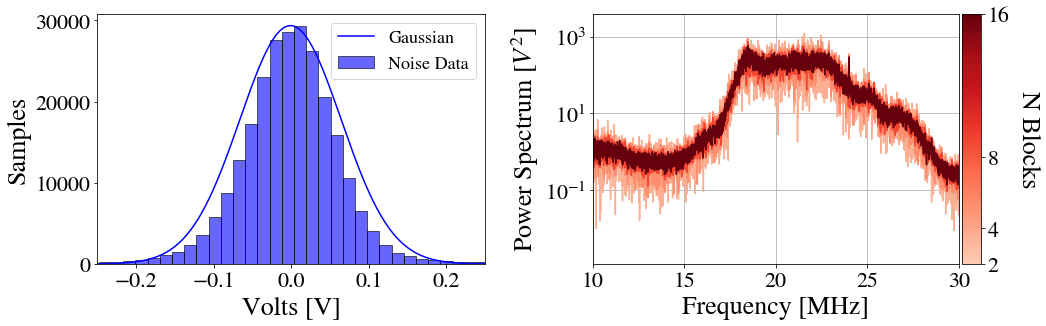

In [268]:
avg_02 = np.mean(calc_power_fft(data_100_new[0,:2,:]), axis=0)
avg_04 = np.mean(calc_power_fft(data_100_new[0,:4,:]), axis=0)
avg_08 = np.mean(calc_power_fft(data_100_new[0,:8,:]), axis=0)
avg_16 = np.mean(calc_power_fft(data_100_new[0,:16,:]), axis=0)
avg_100 = np.mean(calc_power_fft(data_100_new[0,:100,:]), axis=0)

cmap = plt.cm.Reds #choose cmap
n = 100 #number of colormap sample points to choose from
colors = cmap(np.linspace(0.2,1,n)) # sampling n different colors from the colormap
cmap = mpl.colors.ListedColormap(colors)
nums = [2,4,8,16]
colors_choose = [colors[int((i/16) * 100) - 1] for i in nums]


fig, (ax1, ax) = plt.subplots(1,2, figsize=(15,5))
ax.plot(freq*10, avg_02, color=colors_choose[0])
ax.plot(freq*10, avg_04, color=colors_choose[1])
ax.plot(freq*10, avg_08, color=colors_choose[2])
ax.plot(freq*10, avg_16, color=colors_choose[3])
ax.semilogy()

norm_scaling = mpl.colors.Normalize(vmin=2, vmax=16) #set the max and min y value for your cmap
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax, ticks=[2,4,8,16])
cbar.set_label("N Blocks",rotation=270,labelpad=30, fontsize=26) #give cbar a label and rotate it 
ax.set_ylim(0,4000)
ax.set_xlim(10,30)
ax.set_xlabel("Frequency [MHz]", fontsize=26)
ax.set_ylabel("Power Spectrum [$V^2$]", fontsize=26)
ax.grid()


x_lin =np.linspace(-0.6, 0.6, 1000)
nbins = 80

ax1.hist(data_16.flatten()/2**15, bins=nbins, alpha=0.6,label="Noise Data", color="blue",edgecolor='black')
ax1.plot(x_lin, gaussian(x_lin, np.max(np.histogram(data_16.flatten()/2**15, bins=nbins)[0]), mean,
                         np.std(data_16.flatten()/2**15)),color="blue", label="Gaussian")
ax1.legend(fontsize=18)
ax1.set_xlim(-0.25, 0.25)
ax1.set_xlabel("Volts [V]", fontsize=26)
ax1.set_ylabel("Samples", fontsize=26)
fig.tight_layout()
# fig.savefig("Noise.pdf", dpi=300)
plt.show()

In [236]:
indices = np.where(np.logical_and(freq*10 > 20, freq*10 < 22.5))

#SNR = mean/std 

print(np.mean(avg_02/avg_100)/ np.std(avg_02/avg_100))
print(np.mean(avg_04/avg_100)/ np.std(avg_04/avg_100))
print(np.mean(avg_08/avg_100)/ np.std(avg_08/avg_100))
print(np.mean(avg_16/avg_100)/ np.std(avg_16/avg_100))

1.414643145005197
2.02031102534187
2.872508160671939
4.195193366592109


In [237]:
np.save("final_noise_data.npy", data_100_new)

In [247]:
cmap()